In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from collections import Counter, defaultdict
import string
import nltk
from nltk.corpus import stopwords
import spacy
from spacy.matcher import Matcher
from spacy import displacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import joblib

# TensorFlow Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Hugging Face Pegasus Imports
from transformers import PegasusTokenizer, TFPegasusForConditionalGeneration

# Seaborn and Matplotlib for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Create the Kaggle directory and move the kaggle.json file
# Move the kaggle.json File
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datafiniti/consumer-reviews-of-amazon-products

Dataset URL: https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products
License(s): CC-BY-NC-SA-4.0
 98% 16.0M/16.3M [00:02<00:00, 13.9MB/s]
100% 16.3M/16.3M [00:02<00:00, 6.74MB/s]


In [ ]:
!unzip consumer-reviews-of-amazon-products.zip

Archive:  consumer-reviews-of-amazon-products.zip
  inflating: 1429_1.csv              
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv  
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [ ]:
# Load the dataset into a dataframe
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Display the first 5 rows of the dataframe
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
# Selecting the relevant columns
dataset = df.iloc[:, [0, 1, 2, 3, 20, 12, 18]]
# Renaming the columns
dataset = dataset.rename(columns={'id': 'ID', 'dateAdded': 'DateAdded', 'dateUpdated': 'DateUpdated', 'name': 'ProductName','reviews.text': 'ReviewText', 'reviews.date': 'ReviewDate', 'reviews.rating': 'ReviewRating'})

In [ ]:
# Display the first few rows to confirm the changes
dataset.head()

,ID,DateAdded,DateUpdated,ProductName,ReviewText,ReviewDate,ReviewRating
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,I order 3 of them and one of the item is bad q...,2017-03-02T00:00:00.000Z,3
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Bulk is always the less expensive way to go fo...,2016-08-31T00:00:00.000Z,4
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Well they are not Duracell but for the price i...,2016-12-06T00:00:00.000Z,5
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Seem to work as well as name brand batteries a...,2016-03-28T00:00:00.000Z,5
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,These batteries are very long lasting the pric...,2017-04-22T00:00:00.000Z,5


In [ ]:
# Get to total number of each product by name
dataset.ProductName.value_counts()

,count
ProductName,
AmazonBasics AAA Performance Alkaline Batteries (36 Count),8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,3728
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",2443
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",2370
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",1676
...,...
Echo Dot (Previous generation),1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42x28x30 Inches),1
AmazonBasics Silicone Hot Handle Cover/Holder - Red,1


In [ ]:
# Show first 50 products
print(dataset['ProductName'].value_counts().head(50))

ProductName
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                                                                8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                                                            3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers                                                                         2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                                     2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                                                                                    1676
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                                                                                    1425
Fire Kids Edition Tablet, 7 Displa

In [ ]:
# create a dataframe that contains only "Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black"

dataset = dataset[dataset['ProductName'] == 'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black']

In [ ]:
# drop the productname column
dataset = dataset.drop('ProductName', axis=1)

In [ ]:
dataset.to_csv('amazon_reviews_dataset.csv', index=False)

In [ ]:
dataset

,ID,DateAdded,DateUpdated,ReviewText,ReviewDate,ReviewRating
17860,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,Bought this to carry around for Internet and g...,2016-06-24T00:00:00.000Z,5
17861,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,"First bought the Fire HD 8"" for myself and lik...",2017-01-23T00:00:00.000Z,5
17863,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,I'm an author and frequently give these away a...,2017-03-31T00:00:00.000Z,5
17864,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,"This was a birthday present for my sister, and...",2016-05-07T00:00:00.000Z,4
17865,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,I bought this as a gift to my parents. The unf...,2017-01-23T00:00:00.000Z,3
...,...,...,...,...,...,...
19102,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,I don't recommend buying this. After 1 month o...,2017-04-17T00:00:00.000Z,1
19103,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,I bought this product 4 months back. It is ver...,2016-11-30T00:00:00.000Z,1
19104,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,Bought for my son. Works great. Great tablet f...,2017-02-06T00:00:00.000Z,5
19105,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2019-03-03T02:47:22Z,My daughter bought this with her birthday mone...,2017-02-18T00:00:00.000Z,5


In [ ]:
# total number of rating per review star
dataset.ReviewRating.value_counts()

,count
ReviewRating,
5,648
4,298
3,45
1,18
2,15


In [ ]:
# Convert to datetime format and keep only the date part (YYYY-MM-DD)
dataset['DateAdded'] = pd.to_datetime(dataset['DateAdded']).dt.date
dataset['DateUpdated'] = pd.to_datetime(dataset['DateUpdated']).dt.date
dataset['ReviewDate'] = pd.to_datetime(dataset['ReviewDate']).dt.date

# Verify the changes
dataset.head()

,ID,DateAdded,DateUpdated,ReviewText,ReviewDate,ReviewRating
17860,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought this to carry around for Internet and g...,2016-06-24,5
17861,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"First bought the Fire HD 8"" for myself and lik...",2017-01-23,5
17863,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I'm an author and frequently give these away a...,2017-03-31,5
17864,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"This was a birthday present for my sister, and...",2016-05-07,4
17865,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this as a gift to my parents. The unf...,2017-01-23,3


In [ ]:
# Check for missing values
print(dataset.isnull().sum())

ID              0
DateAdded       0
DateUpdated     0
ReviewText      0
ReviewDate      0
ReviewRating    0
dtype: int64


# Data Preprocessing



In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Preprocess the reviews: clean, remove punctuation, stopwords, etc.
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Remove numbers and other irrelevant symbols
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply preprocessing to the 'ReviewText' column
dataset['ProcessedReview'] = dataset['ReviewText'].apply(preprocess_text)

# Flatten the list of all words from all reviews
all_words = [word for review in dataset['ProcessedReview'] for word in review]

# Calculate word frequency
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(50)  # Show the 50 most common words
for word, freq in common_words:
    print(f"{word}: {freq}")

tablet: 454
great: 324
use: 221
bought: 207
kindle: 172
one: 171
easy: 166
good: 161
fire: 159
love: 157
price: 150
books: 137
amazon: 117
loves: 116
games: 106
product: 97
apps: 96
like: 92
old: 87
would: 84
kids: 83
reading: 78
play: 76
get: 76
read: 75
gift: 74
works: 74
perfect: 72
purchased: 71
also: 70
well: 68
buy: 66
size: 61
best: 60
got: 58
screen: 58
son: 56
time: 54
year: 54
nice: 52
better: 52
much: 50
daughter: 50
new: 48
little: 46
tablets: 45
happy: 43
recommend: 43
purchase: 43
really: 41


## Sentiment Analysis Based on Review Ratings

### Define sentiment categories based on `ReviewRating:`
- Positive: Ratings 4 and 5.
- Neutral: Rating 3.
- Negative: Ratings 1 and 2.

In [ ]:
def categorize_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

dataset['Sentiment'] = dataset['ReviewRating'].apply(categorize_sentiment)

# Verify the changes
dataset.head()

,ID,DateAdded,DateUpdated,ReviewText,ReviewDate,ReviewRating,ProcessedReview,Sentiment
17860,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought this to carry around for Internet and g...,2016-06-24,5,"[bought, carry, around, internet, gaming, far,...",Positive
17861,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"First bought the Fire HD 8"" for myself and lik...",2017-01-23,5,"[first, bought, fire, hd, liked, well, got, on...",Positive
17863,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I'm an author and frequently give these away a...,2017-03-31,5,"[im, author, frequently, give, away, promotion...",Positive
17864,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"This was a birthday present for my sister, and...",2016-05-07,4,"[birthday, present, sister, trouble, getting, ...",Positive
17865,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this as a gift to my parents. The unf...,2017-01-23,3,"[bought, gift, parents, unfortunate, part, lit...",Neutral


count    1024.000000
mean       26.528320
std        22.696846
min         6.000000
25%        13.000000
50%        20.000000
75%        30.250000
max       251.000000
Name: ReviewLength, dtype: float64


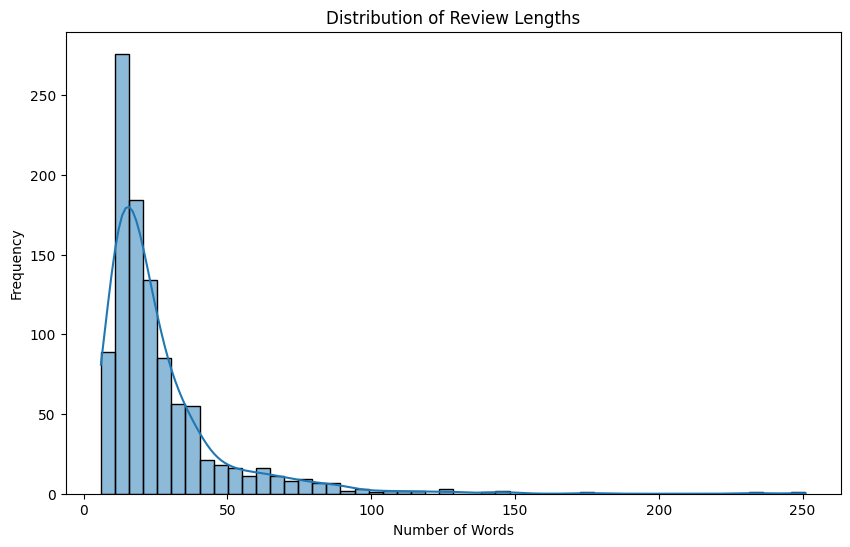

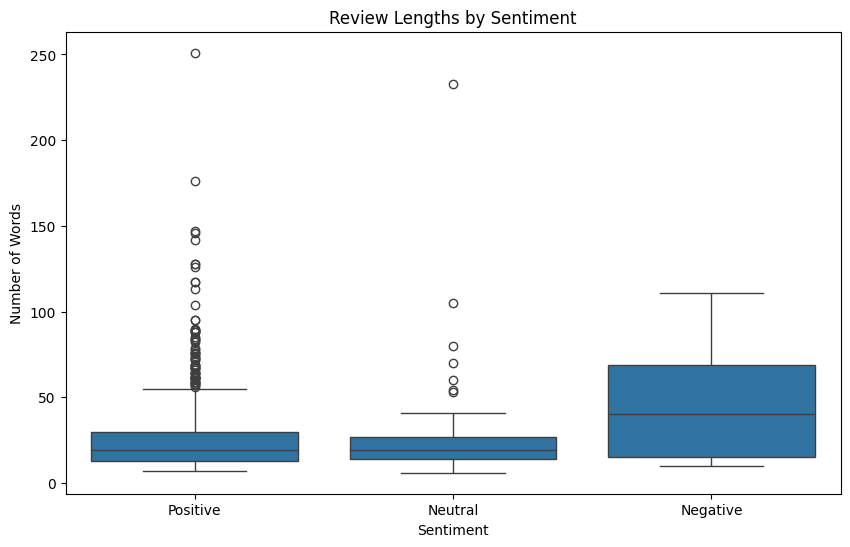

Average review length by sentiment:
Sentiment
Negative    44.848485
Neutral     30.133333
Positive    25.717759
Name: ReviewLength, dtype: float64
Correlation between review length and sentiment:
                ReviewLength  SentimentValue
ReviewLength        1.000000       -0.147078
SentimentValue     -0.147078        1.000000


In [ ]:
# Calculate the length of each review
dataset['ReviewLength'] = dataset['ReviewText'].apply(lambda x: len(x.split()))

# Display basic statistics for the review lengths
print(dataset['ReviewLength'].describe())

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
sns.histplot(dataset['ReviewLength'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Boxplot of review lengths across different sentiment classes
plt.figure(figsize=(10,6))
sns.boxplot(x='Sentiment', y='ReviewLength', data=dataset)
plt.title('Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

# Grouping by sentiment and calculating mean review length per sentiment class
length_by_sentiment = dataset.groupby('Sentiment')['ReviewLength'].mean()
print("Average review length by sentiment:")
print(length_by_sentiment)

# Correlation between length of review and sentiment
# (Assign numerical values to sentiments if necessary, e.g., Positive=1, Neutral=0, Negative=-1)
dataset['SentimentValue'] = dataset['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})
correlation = dataset[['ReviewLength', 'SentimentValue']].corr()
print("Correlation between review length and sentiment:")
print(correlation)


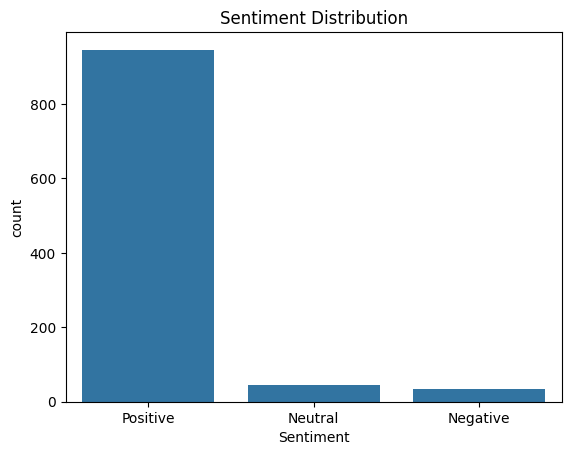

In [ ]:
# Sentiment distribution
sns.countplot(x='Sentiment', data=dataset)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
dataset.columns

Index(['ID', 'DateAdded', 'DateUpdated', 'ReviewText', 'ReviewDate',
       'ReviewRating', 'ProcessedReview', 'Sentiment', 'ReviewLength',
       'SentimentValue'],
      dtype='object')

## Define the Product and Part Patterns

In [ ]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')

# Create a matcher object
matcher = Matcher(nlp.vocab)

# Product patterns to match common variations for the Fire tablet and related products
product_patterns = [
    [{"LOWER": "fire"}, {"LOWER": "hd"}, {"IS_DIGIT": True}],  # Match variations like "Fire HD 8", "Fire HD 10"
    [{"LOWER": "fire"}, {"LOWER": "tablet"}],  # Match variations like "Fire tablet"
    [{"LOWER": "tablet"}],  # Match general mentions of "tablet"
    [{"LOWER": "kindle"}, {"LOWER": "fire"}],  # Kindle Fire tablets
    [{"LOWER": "kindle"}]  # Kindle
]

part_patterns = [
    [{"LOWER": "screen"}],
    [{"LOWER": "display"}],
    [{"LOWER": "camera"}],
    [{"LOWER": "battery"}],
    [{"LOWER": "charger"}],
    [{"LOWER": "case"}],
    [{"LOWER": "google"}, {"LOWER": "play"}, {"LOWER": "store"}],
    [{"LOWER": "amazon"}, {"LOWER": "app"}, {"LOWER": "store"}],
    [{"LOWER": "pin"}, {"LOWER": "protected"}, {"LOWER": "parent"}, {"LOWER": "lock"}],
    [{"LOWER": "navigation"}],
    [{"LOWER": "settings"}],
    [{"LOWER": "night"}, {"LOWER": "mode"}],
    [{"LOWER": "night"}, {"LOWER": "mode"}],
    [{"LOWER": "wifi"}],
    [{"LOWER": "connectivity"}]
]

# Add patterns to the matcher
matcher.add("Product", product_patterns)
matcher.add("Part", part_patterns)

## Apply the Matcher to Extract Entities

In [ ]:
# Function to apply the matcher and extract unique Product and Part entities
def extract_custom_entities(review):
    doc = nlp(review)
    matches = matcher(doc)
    entities = set()  # Use a set to store unique entities
    for match_id, start, end in matches:
        entity_label = nlp.vocab.strings[match_id]  # 'Product' or 'Part'
        entity_text = doc[start:end].text  # The actual matched text
        entities.add((entity_text, entity_label))  # Add to the set (ensures uniqueness)
    return list(entities)  # Convert set back to list for easier handling

# Apply the function to the 'ReviewText' column
dataset['CustomEntities'] = dataset['ReviewText'].apply(extract_custom_entities)

# Display the first few rows with unique custom entities
dataset[['ReviewText', 'CustomEntities']].head()

,ReviewText,CustomEntities
17860,Bought this to carry around for Internet and g...,[]
17861,"First bought the Fire HD 8"" for myself and lik...","[(Fire HD 8, Product)]"
17863,I'm an author and frequently give these away a...,[]
17864,"This was a birthday present for my sister, and...","[(Fire HD 10, Product), (case, Part)]"
17865,I bought this as a gift to my parents. The unf...,"[(connectivity, Part), (tablet, Product)]"


In [ ]:
dataset

,ID,DateAdded,DateUpdated,ReviewText,ReviewDate,ReviewRating,ProcessedReview,Sentiment,ReviewLength,SentimentValue,CustomEntities
17860,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought this to carry around for Internet and g...,2016-06-24,5,"[bought, carry, around, internet, gaming, far,...",Positive,13,1,[]
17861,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"First bought the Fire HD 8"" for myself and lik...",2017-01-23,5,"[first, bought, fire, hd, liked, well, got, on...",Positive,21,1,"[(Fire HD 8, Product)]"
17863,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I'm an author and frequently give these away a...,2017-03-31,5,"[im, author, frequently, give, away, promotion...",Positive,15,1,[]
17864,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"This was a birthday present for my sister, and...",2016-05-07,4,"[birthday, present, sister, trouble, getting, ...",Positive,67,1,"[(Fire HD 10, Product), (case, Part)]"
17865,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this as a gift to my parents. The unf...,2017-01-23,3,"[bought, gift, parents, unfortunate, part, lit...",Neutral,60,0,"[(connectivity, Part), (tablet, Product)]"
...,...,...,...,...,...,...,...,...,...,...,...
19102,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I don't recommend buying this. After 1 month o...,2017-04-17,1,"[dont, recommend, buying, month, buying, wont,...",Negative,17,-1,[]
19103,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this product 4 months back. It is ver...,2016-11-30,1,"[bought, product, months, back, slow, cant, op...",Negative,69,-1,[]
19104,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought for my son. Works great. Great tablet f...,2017-02-06,5,"[bought, son, works, great, great, tablet]",Positive,11,1,"[(tablet, Product)]"
19105,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,My daughter bought this with her birthday mone...,2017-02-18,5,"[daughter, bought, birthday, money, loves, alw...",Positive,16,1,[]


In [ ]:
dataset.to_csv('amazon_reviews_dataset_With_NER.csv', index=False)

In [ ]:
# Visualize only Product and Part entities
def visualize_entities(review):
    doc = nlp(review)
    matches = matcher(doc)
    spans = []  # To hold the custom entity spans for visualization
    for match_id, start, end in matches:
        entity_label = nlp.vocab.strings[match_id]  # Get 'Product' or 'Part'
        span = doc[start:end]  # Get the span of the matched text
        spans.append({"start": span.start_char, "end": span.end_char, "label": entity_label})  # Store positions

    # Render the visualization with custom entities
    displacy.render({"text": doc.text, "ents": spans, "title": None}, style="ent", manual=True, jupyter=True)

In [ ]:
for review in dataset['ReviewText'].head(5):  # visualize few reviews
    visualize_entities(review)

In [ ]:
dataset

,ID,DateAdded,DateUpdated,ReviewText,ReviewDate,ReviewRating,ProcessedReview,Sentiment,ReviewLength,SentimentValue,CustomEntities
17860,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought this to carry around for Internet and g...,2016-06-24,5,"[bought, carry, around, internet, gaming, far,...",Positive,13,1,[]
17861,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"First bought the Fire HD 8"" for myself and lik...",2017-01-23,5,"[first, bought, fire, hd, liked, well, got, on...",Positive,21,1,"[(Fire HD 8, Product)]"
17863,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I'm an author and frequently give these away a...,2017-03-31,5,"[im, author, frequently, give, away, promotion...",Positive,15,1,[]
17864,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,"This was a birthday present for my sister, and...",2016-05-07,4,"[birthday, present, sister, trouble, getting, ...",Positive,67,1,"[(Fire HD 10, Product), (case, Part)]"
17865,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this as a gift to my parents. The unf...,2017-01-23,3,"[bought, gift, parents, unfortunate, part, lit...",Neutral,60,0,"[(connectivity, Part), (tablet, Product)]"
...,...,...,...,...,...,...,...,...,...,...,...
19102,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I don't recommend buying this. After 1 month o...,2017-04-17,1,"[dont, recommend, buying, month, buying, wont,...",Negative,17,-1,[]
19103,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,I bought this product 4 months back. It is ver...,2016-11-30,1,"[bought, product, months, back, slow, cant, op...",Negative,69,-1,[]
19104,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,Bought for my son. Works great. Great tablet f...,2017-02-06,5,"[bought, son, works, great, great, tablet]",Positive,11,1,"[(tablet, Product)]"
19105,AVpgdkC8ilAPnD_xsvyi,2016-04-10,2019-03-03,My daughter bought this with her birthday mone...,2017-02-18,5,"[daughter, bought, birthday, money, loves, alw...",Positive,16,1,[]


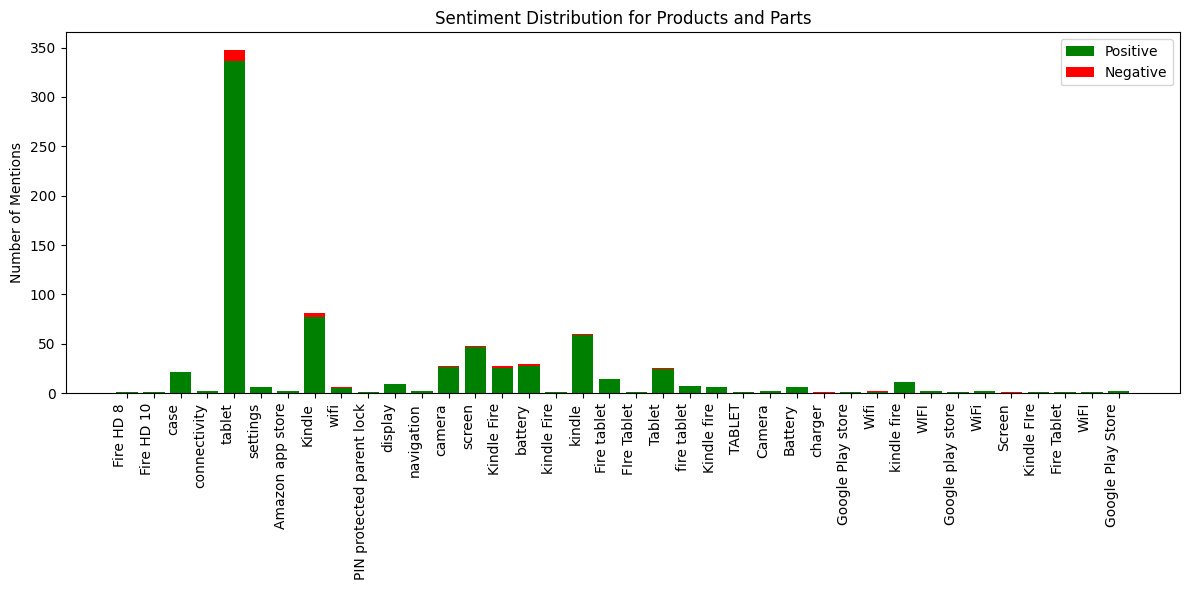

In [ ]:
filtered_dataset = dataset[dataset['CustomEntities'].apply(lambda x: len(x) > 0)]

# Initialize dictionaries to store counts for positive and negative mentions per entity
entity_sentiment_counts = {}

# Count positive and negative mentions per entity
for _, row in filtered_dataset.iterrows():
    for entity, label in row['CustomEntities']:
        if entity not in entity_sentiment_counts:
            entity_sentiment_counts[entity] = {'positive': 0, 'negative': 0}

        if row['Sentiment'] == 'Positive':
            entity_sentiment_counts[entity]['positive'] += 1
        elif row['Sentiment'] == 'Negative':
            entity_sentiment_counts[entity]['negative'] += 1

# Prepare data for plotting
entities = list(entity_sentiment_counts.keys())
positives = [entity_sentiment_counts[entity]['positive'] for entity in entities]
negatives = [entity_sentiment_counts[entity]['negative'] for entity in entities]

# Now plot the data
plt.figure(figsize=(12, 6))  # Increased figure size for more room

# Create the bar chart for positive and negative mentions
plt.bar(entities, positives, label='Positive', color='g')
plt.bar(entities, negatives, bottom=positives, label='Negative', color='r')

# Rotate the labels to avoid overlap
plt.xticks(rotation=90, ha='right')  # Rotate labels 90 degrees for better readability

# Add labels and title
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for Products and Parts')
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

## Entity Co-occurrence Analysis
- This will help identify patterns of frequently co-mentioned parts and products. For example, you could find that battery and charger are often mentioned together, or that the screen is frequently discussed in relation to the Fire HD 8.

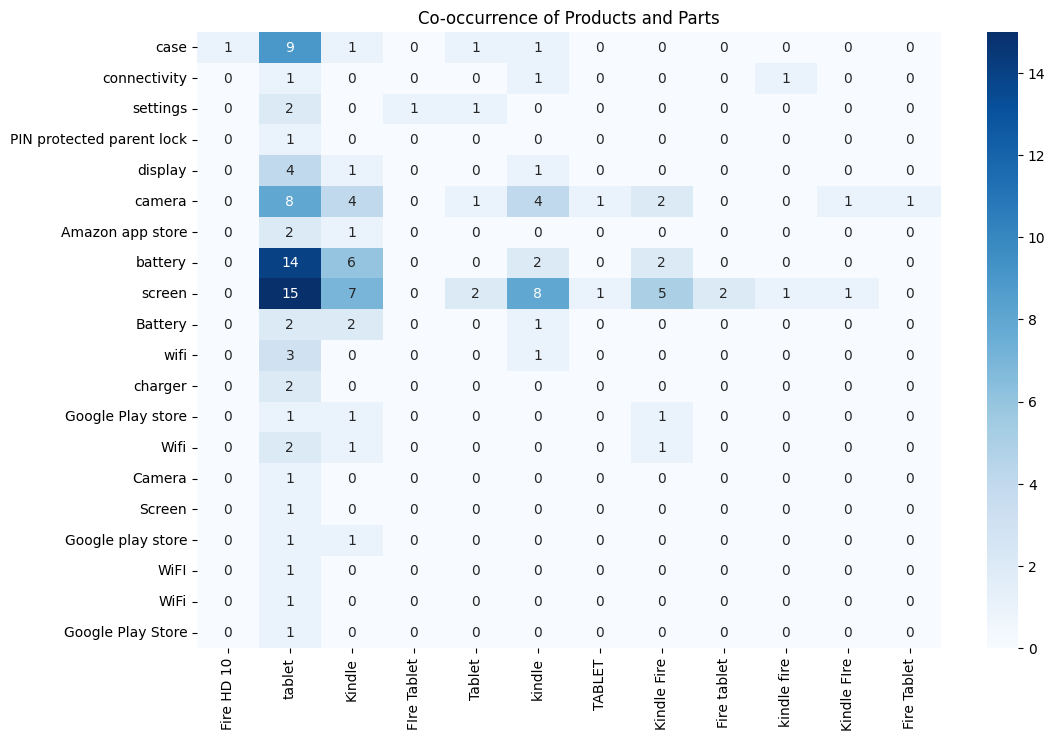

In [ ]:
# Initialize co-occurrence matrix
co_occurrence = defaultdict(lambda: defaultdict(int))

# Count co-occurrence between parts and products
for entities in dataset['CustomEntities']:
    products = [ent for ent, label in entities if label == 'Product']
    parts = [ent for ent, label in entities if label == 'Part']
    for product in products:
        for part in parts:
            co_occurrence[product][part] += 1

# Convert to a DataFrame for visualization
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0)

# Plot heatmap for co-occurrence
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_df, annot=True, cmap="Blues")
plt.title('Co-occurrence of Products and Parts')
plt.show()

## Dataset Analysis and Reporting


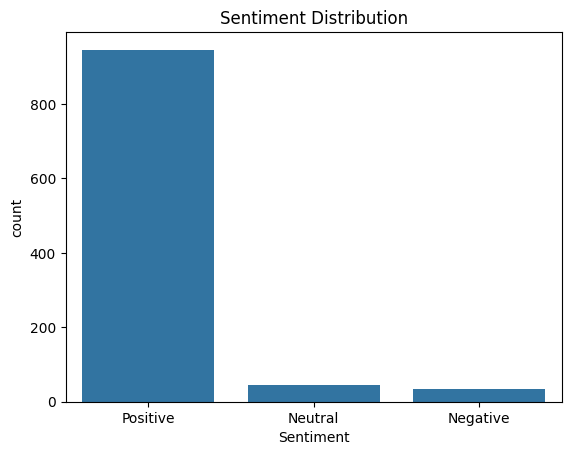

In [ ]:
# Sentiment distribution
sns.countplot(x='Sentiment', data=dataset)
plt.title('Sentiment Distribution')
plt.show()

## Dataset Splitting (Task 3):
Split the dataset into training and test sets. For instance, an 80/20 split can be used for training and testing.

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the dataset with 'ReviewText' as the feature and 'Sentiment' as the target
X = dataset['ReviewText']
y = dataset['Sentiment']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to DataFrames for easier manipulation later
train_df = pd.DataFrame({'ReviewText': X_train, 'Sentiment': y_train})
test_df = pd.DataFrame({'ReviewText': X_test, 'Sentiment': y_test})

In [ ]:
train_df

,ReviewText,Sentiment
18761,Great device. Travels well. Easy to navigate. ...,Positive
18772,Love my kindle! At the price it is the best va...,Positive
18728,The Kindle was bought for my nine year old gra...,Positive
18314,"Gave it to my grandkids (ages 3, 4 & 9) for Ch...",Positive
18324,Purchased this for my son. Has room to upgrade...,Positive
...,...,...
18765,"I have had 4 kindles over the years , got to h...",Positive
18227,Great bang for your buck. Great for taking to ...,Positive
18934,Perfect for what I need to use it for movies e...,Positive
18675,The Amazon Fire 7 Tablet 16GB is very a good v...,Positive


In [ ]:
test_df

,ReviewText,Sentiment
18395,Upgrading from an older version. This kindle i...,Positive
18952,"PERFECT SIZE FOR TRAVELING, COMPACT AND LIGHT,...",Positive
19103,I bought this product 4 months back. It is ver...,Negative
18919,Not happy at first as battery was totally dead...,Neutral
19100,Good price. Works well. Best Buy sales associa...,Positive
...,...,...
18379,The images are crisp and text very easy to rea...,Positive
18171,The kids will have a lot of fun time with game...,Positive
19068,Gift was on point. Recipient was very pleased....,Positive
18499,I bought two of these for two of my children. ...,Positive


## Handling the Imbalanced Dataset:


In [ ]:
X = dataset['ReviewText']
y = dataset['Sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert the text data to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Encode labels as integers
label_mapping = {'Positive': 0, 'Neutral': 1, 'Negative': 2}
y_train_encoded = y_train.map(label_mapping)

# Apply SMOTE to generate synthetic samples for the minority classes
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train_encoded)

# Check the new class distribution after SMOTE
print(np.bincount(y_resampled))

[757 757 757]


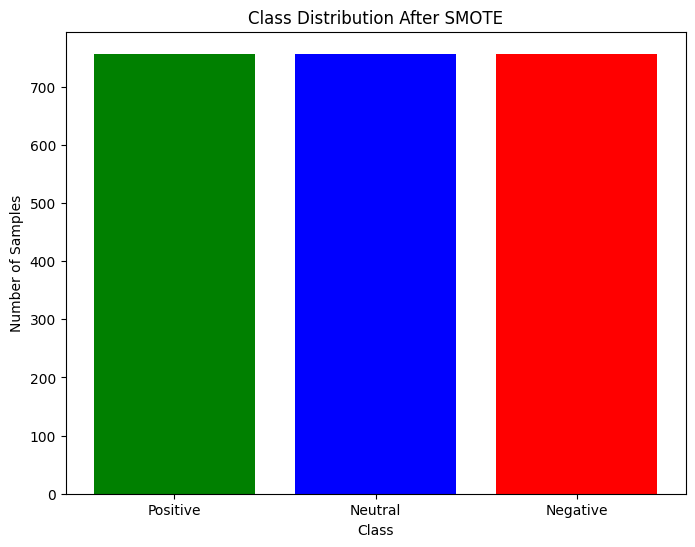

In [ ]:
# Get the counts of each class
class_counts = np.bincount(y_resampled)

# Define labels for the classes
class_labels = ['Positive', 'Neutral', 'Negative']

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['green', 'blue', 'red'])

# Add labels and title
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()

## Experiment 1 - Baseline Model

In [ ]:
# Define the TensorFlow model
model_1 = Sequential()
model_1.add(Input(shape=(1000,)))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(3, activation='softmax'))  # 3 output classes: Positive, Neutral, Negative

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train your TensorFlow model and store the history
history_1 = model_1.fit(X_resampled.toarray(), y_resampled,
                    validation_data=(X_test_tfidf.toarray(), y_test.map(label_mapping)),
                    epochs=75,
                    batch_size=32)

Epoch 1/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.6166 - loss: 0.9814 - val_accuracy: 0.9171 - val_loss: 0.4700
Epoch 2/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.1841 - val_accuracy: 0.9366 - val_loss: 0.2840
Epoch 3/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0365 - val_accuracy: 0.9366 - val_loss: 0.3340
Epoch 4/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0127 - val_accuracy: 0.9366 - val_loss: 0.3720
Epoch 5/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0079 - val_accuracy: 0.9366 - val_loss: 0.4173
Epoch 6/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9268 - val_loss: 0.4245
Epoch 7/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9268 - val_loss: 0.4464
Epoch 8/75
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.9268 - val_loss

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_tfidf.toarray(), y_test.map(label_mapping))
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9214 - loss: 0.9831 
Test Accuracy: 0.9268292784690857


In [ ]:
# !pip freeze > requirements_colab.txt

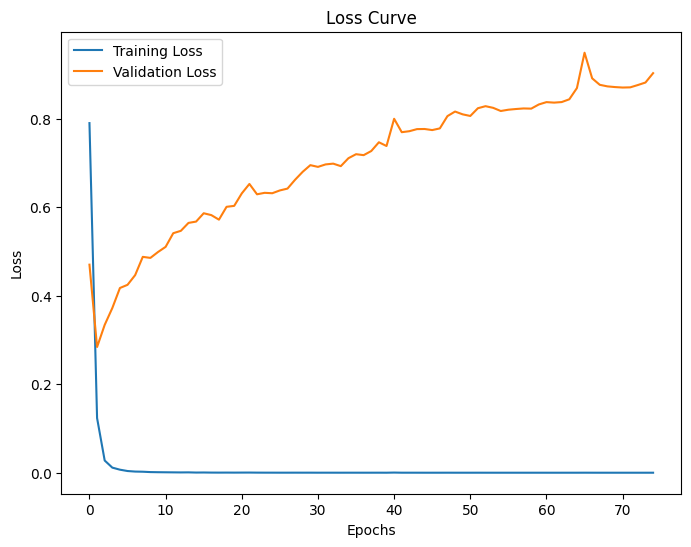

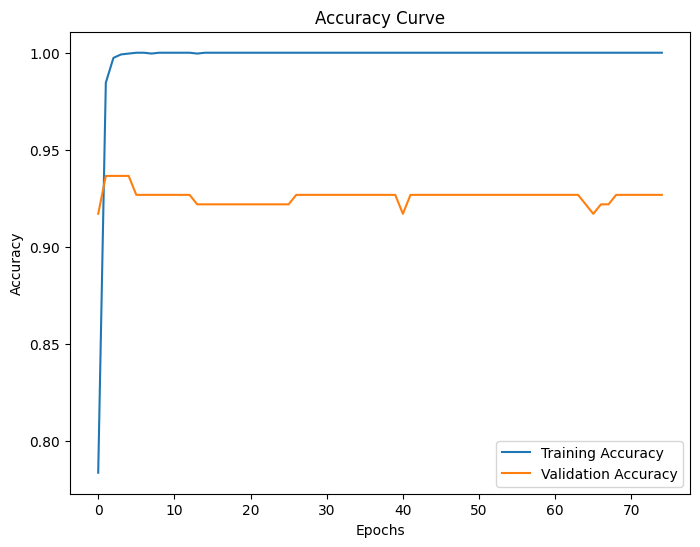

In [ ]:
# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(8, 6))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


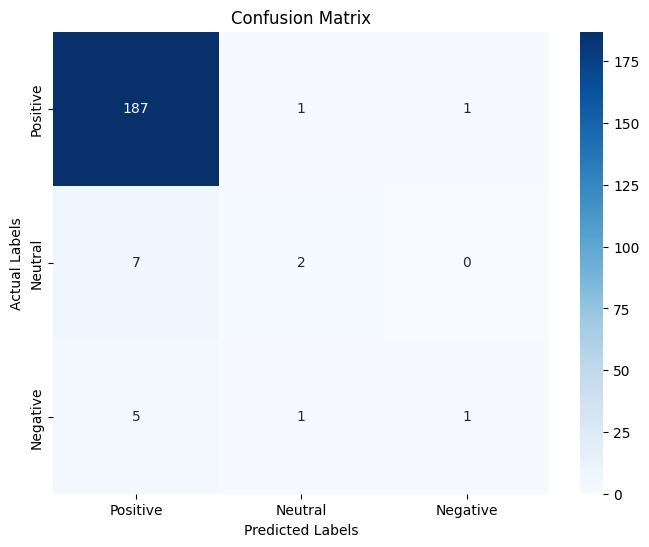

Classification Report:
              precision    recall  f1-score   support

    Positive       0.94      0.99      0.96       189
     Neutral       0.50      0.22      0.31         9
    Negative       0.50      0.14      0.22         7

    accuracy                           0.93       205
   macro avg       0.65      0.45      0.50       205
weighted avg       0.91      0.93      0.91       205



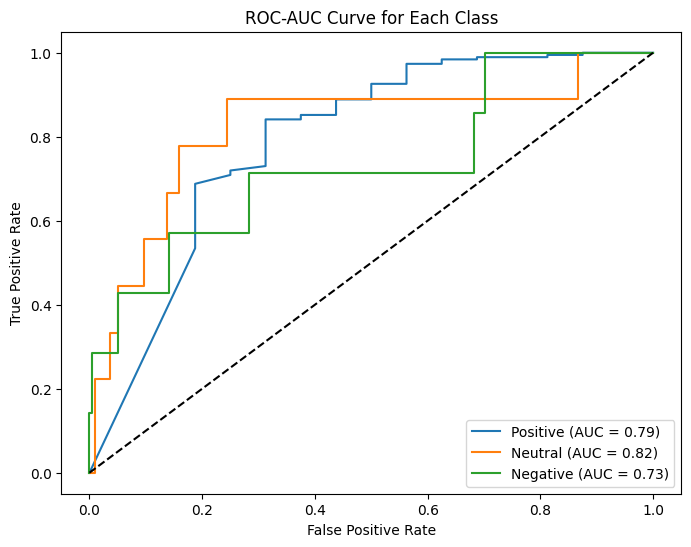

In [ ]:
# Predict the test set labels
y_pred = model_1.predict(X_test_tfidf.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class with highest probability

# Map test labels to integers
y_test_encoded = y_test.map(label_mapping)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# 2. Classification Report: Precision, Recall, and F1-Score
print('Classification Report:')
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_mapping.keys()))

# 3. ROC-AUC for each class
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)  # One-hot encoding of the test labels

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(label_mapping.values()):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(label_mapping.keys()):
    plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC-AUC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Experiment 2 - Improve Model's Generalisation

In [ ]:
# Define the TensorFlow model with added regularization
model_2 = Sequential()
model_2.add(Input(shape=(1000,)))
model_2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model_2.add(Dropout(0.6))  # Increased Dropout to 60%
model_2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Add L2 regularization 0.01
model_2.add(Dense(3, activation='softmax'))  # 3 output classes: Positive, Neutral, Negative

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model with early stopping
history_2 = model_2.fit(X_resampled.toarray(), y_resampled,
                    validation_data=(X_test_tfidf.toarray(), y_test.map(label_mapping)),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.4709 - loss: 3.4638 - val_accuracy: 0.5317 - val_loss: 1.9640
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8041 - loss: 1.6569 - val_accuracy: 0.7171 - val_loss: 1.3573
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9084 - loss: 0.9807 - val_accuracy: 0.8878 - val_loss: 0.9635
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9723 - loss: 0.6735 - val_accuracy: 0.9366 - val_loss: 0.7260
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.5564 - val_accuracy: 0.9220 - val_loss: 0.6491
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.4839 - val_accuracy: 0.9122 - val_loss: 0.5913
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.4465 - val_accuracy: 0.9220 - val_loss: 0.6083
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.4165 - val_accuracy: 0.9171 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_2.evaluate(X_test_tfidf.toarray(), y_test.map(label_mapping))
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9272 - loss: 0.3962  
Test Accuracy: 0.9268292784690857


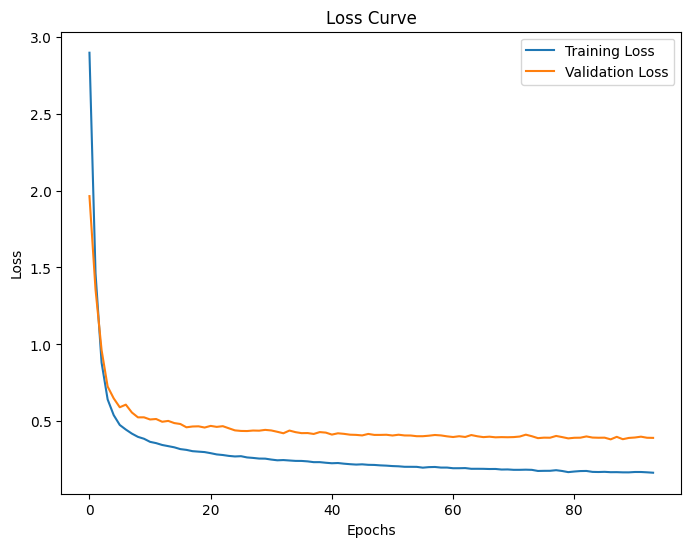

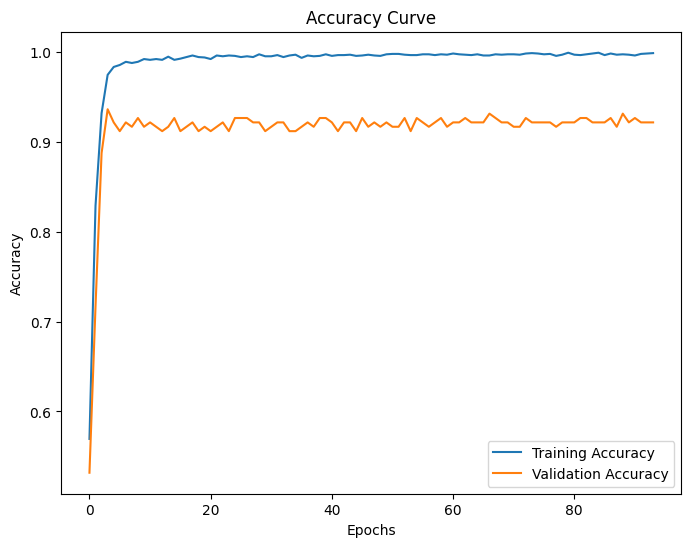

In [ ]:
# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy Curve
plt.figure(figsize=(8, 6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


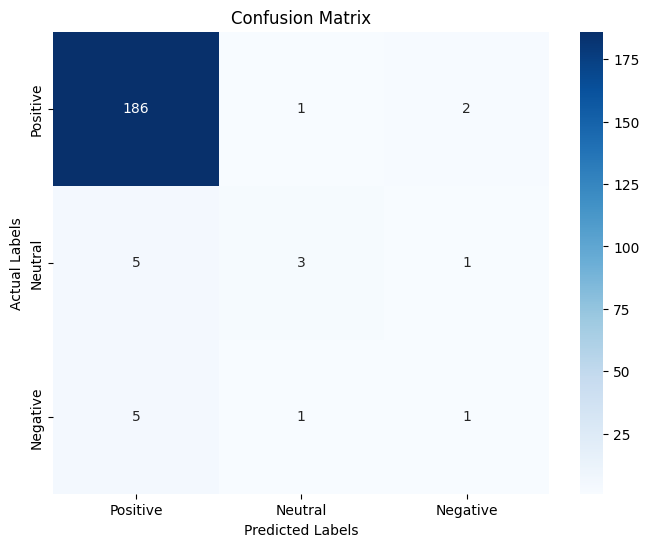

Classification Report:
              precision    recall  f1-score   support

    Positive       0.95      0.98      0.97       189
     Neutral       0.60      0.33      0.43         9
    Negative       0.25      0.14      0.18         7

    accuracy                           0.93       205
   macro avg       0.60      0.49      0.53       205
weighted avg       0.91      0.93      0.92       205



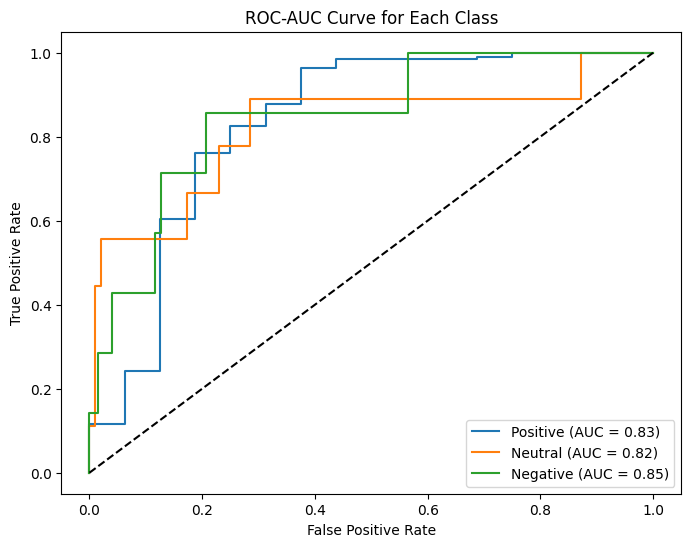

In [ ]:
# Predict the test set labels
y_pred = model_2.predict(X_test_tfidf.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class with highest probability

# Map test labels to integers
y_test_encoded = y_test.map(label_mapping)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# 2. Classification Report: Precision, Recall, and F1-Score
print('Classification Report:')
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_mapping.keys()))

# 3. ROC-AUC for each class
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)  # One-hot encoding of the test labels

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(label_mapping.values()):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(label_mapping.keys()):
    plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC-AUC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Experiment 3 - Improve Class-Wise Accuracy

In [ ]:
# Load Pegasus paraphrasing model and tokenizer
model_name = 'google/pegasus-xsum'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = TFPegasusForConditionalGeneration.from_pretrained(model_name)

# Function to paraphrase a review
def paraphrase_review_tf(review, num_return_sequences=3, num_beams=5):
    inputs = tokenizer([review], max_length=1024, truncation=True, return_tensors='tf')
    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=1024,
        num_beams=num_beams,
        num_return_sequences=num_return_sequences,
        temperature=1.5
    )
    paraphrased_sentences = [tokenizer.decode(output, skip_special_tokens=True, clean_up_tokenization_spaces=False) for output in outputs]
    return paraphrased_sentences


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tf_model.h5:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFPegasusForConditionalGeneration.

Some layers of TFPegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['final_logits_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

In [ ]:
# Filter reviews for Neutral and Negative classes
neutral_reviews = dataset[dataset['Sentiment'] == 'Neutral']['ReviewText']
negative_reviews = dataset[dataset['Sentiment'] == 'Negative']['ReviewText']

# Generate paraphrases
augmented_reviews = []

# Paraphrase Neutral reviews
for review in neutral_reviews:
    paraphrases = paraphrase_review_tf(review, num_return_sequences=3)  # Generate 3 paraphrases per review
    augmented_reviews.extend([(para, 'Neutral') for para in paraphrases])

# Paraphrase Negative reviews
for review in negative_reviews:
    paraphrases = paraphrase_review_tf(review, num_return_sequences=3)  # Generate 3 paraphrases per review
    augmented_reviews.extend([(para, 'Negative') for para in paraphrases])

# Create a new DataFrame for the augmented data
augmented_df = pd.DataFrame(augmented_reviews, columns=['ReviewText', 'Sentiment'])

# Combine original dataset with augmented dataset
dataset_augmented = pd.concat([dataset, augmented_df], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
# Check class distribution after augmentation
print(dataset_augmented['Sentiment'].value_counts())

# Separate each class into different DataFrames
positive_df = dataset_augmented[dataset_augmented['Sentiment'] == 'Positive']
neutral_df = dataset_augmented[dataset_augmented['Sentiment'] == 'Neutral']
negative_df = dataset_augmented[dataset_augmented['Sentiment'] == 'Negative']

# Find the majority class size
majority_size = positive_df.shape[0]

# Resample the Neutral and Negative classes to match the majority class size
neutral_df_resampled = resample(neutral_df, replace=True, n_samples=majority_size, random_state=42)
negative_df_resampled = resample(negative_df, replace=True, n_samples=majority_size, random_state=42)

# Combine the resampled data into one DataFrame
balanced_dataset = pd.concat([positive_df, neutral_df_resampled, negative_df_resampled], ignore_index=True)

# Check the class distribution after balancing
print(balanced_dataset['Sentiment'].value_counts())

Sentiment
Positive    946
Neutral     180
Negative    132
Name: count, dtype: int64
Sentiment
Positive    946
Neutral     946
Negative    946
Name: count, dtype: int64


In [ ]:
# Apply TF-IDF to the balanced dataset (balanced_dataset['ReviewText'])
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features based on your dataset

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(balanced_dataset['ReviewText'],
                                                    balanced_dataset['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42)

# Fit and transform the training data, transform the test data
X_balanced_tfidf = tfidf.fit_transform(X_train)  # Transform training data
X_test_tfidf = tfidf.transform(X_test)  # Transform test data

# Encode the labels
label_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_balanced = y_train.map(label_mapping).values  # Encode training labels
y_test_encoded = y_test.map(label_mapping).values  # Encode test labels

In [ ]:
# Define and compile the TensorFlow model
model_3 = Sequential()

# Input layer
model_3.add(Input(shape=(1000,)))  # Input shape matches TF-IDF feature size (1000 features)

# Add hidden layers with L2 regularization and Dropout
model_3.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization
model_3.add(Dropout(0.6))  # Dropout to prevent overfitting
model_3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization

# Output layer (3 output classes: Positive, Neutral, Negative)
model_3.add(Dense(3, activation='softmax'))

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model using the balanced dataset
history_3 = model_3.fit(X_balanced_tfidf.toarray(), y_balanced,
                        validation_data=(X_test_tfidf.toarray(), y_test_encoded),
                        epochs=100,
                        batch_size=32,
                        callbacks=[early_stopping])

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.4459 - loss: 3.0324 - val_accuracy: 0.8063 - val_loss: 1.3563
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8073 - loss: 1.2203 - val_accuracy: 0.8908 - val_loss: 0.8708
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 0.8157 - val_accuracy: 0.9190 - val_loss: 0.7011
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9288 - loss: 0.6715 - val_accuracy: 0.9278 - val_loss: 0.6440
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9408 - loss: 0.6130 - val_accuracy: 0.9437 - val_loss: 0.6037
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 0.5677 - val_accuracy: 0.9507 - val_loss: 0.5743
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.5484 - val_accuracy: 0.9525 - val_loss: 0.5503
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.5196 - val_accuracy: 0.9525 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_3.evaluate(X_test_tfidf.toarray(), y_test_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.2689 
Test Loss: 0.27399927377700806
Test Accuracy: 0.9771126508712769


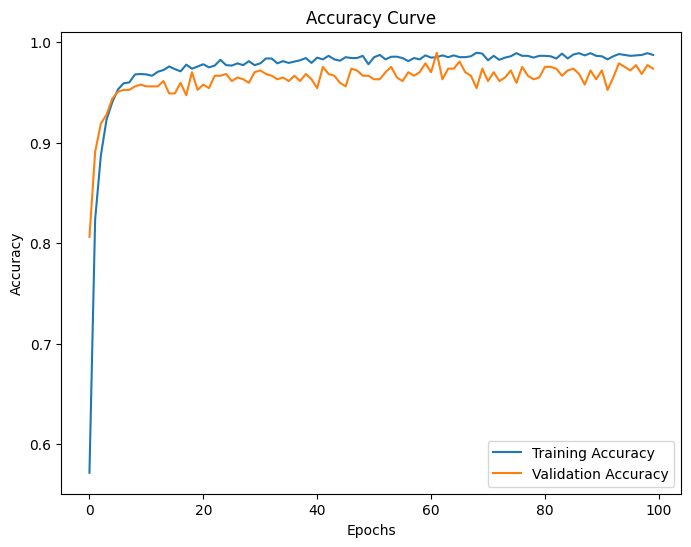

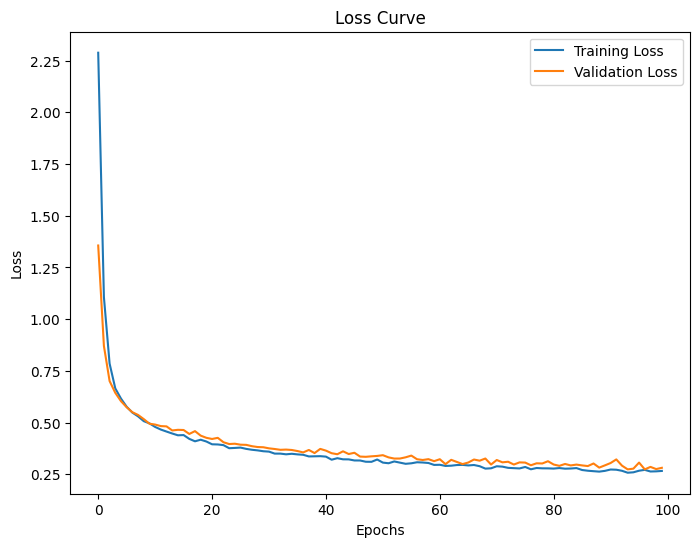

In [ ]:
# Plot Accuracy Curve
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred_prob = model_3.predict(X_test_tfidf.toarray())
y_pred = y_pred_prob.argmax(axis=1)  # Convert probabilities to class predictions

# Print the classification report
print(classification_report(y_test_encoded, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

    Negative       0.98      0.98      0.98       190
     Neutral       0.95      0.99      0.97       184
    Positive       1.00      0.96      0.98       194

    accuracy                           0.98       568
   macro avg       0.98      0.98      0.98       568
weighted avg       0.98      0.98      0.98       568



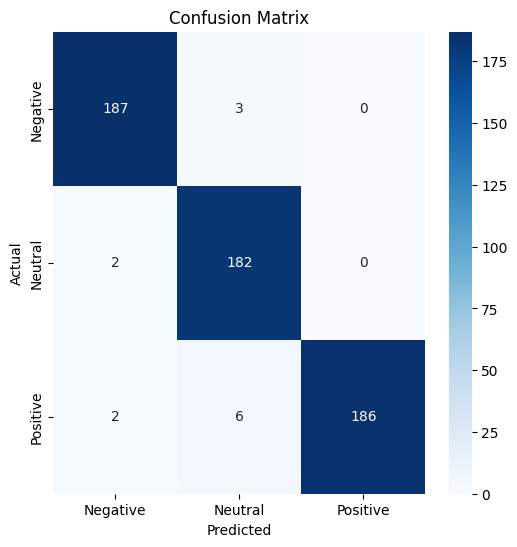

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,739 (1.56 MB)

 Trainable params: 136,579 (533.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 273,160 (1.04 MB)

In [ ]:
# Save the model in HDF5 format
model_3.save('model_3.h5')

In [ ]:
# Load the previously saved model
loaded_model = tf.keras.models.load_model('model_3.h5')

In [ ]:
# Function to set up the custom matcher
def setup_custom_matcher(nlp):
    matcher = Matcher(nlp.vocab)

    # Product patterns
    product_patterns = [
        [{"LOWER": "fire"}, {"LOWER": "hd"}, {"IS_DIGIT": True}],
        [{"LOWER": "fire"}, {"LOWER": "tablet"}],
        [{"LOWER": "tablet"}],
        [{"LOWER": "kindle"}, {"LOWER": "fire"}],
        [{"LOWER": "kindle"}]
    ]

    # Part patterns
    part_patterns = [
        [{"LOWER": "screen"}],
        [{"LOWER": "display"}],
        [{"LOWER": "camera"}],
        [{"LOWER": "battery"}],
        [{"LOWER": "charger"}],
        [{"LOWER": "case"}],
        [{"LOWER": "google"}, {"LOWER": "play"}, {"LOWER": "store"}],
        [{"LOWER": "amazon"}, {"LOWER": "app"}, {"LOWER": "store"}],
        [{"LOWER": "pin"}, {"LOWER": "protected"}, {"LOWER": "parent"}, {"LOWER": "lock"}],
        [{"LOWER": "navigation"}],
        [{"LOWER": "settings"}],
        [{"LOWER": "night"}, {"LOWER": "mode"}],
        [{"LOWER": "wifi"}],
        [{"LOWER": "connectivity"}]
    ]

    # Add patterns to the matcher
    matcher.add("Product", product_patterns)
    matcher.add("Part", part_patterns)

    return matcher

# Function to retrieve and visualize entities in a review
def retrieve_and_visualize_entities(review, nlp, matcher):
    # Process the review with spaCy NLP model
    doc = nlp(review)

    # Apply the matcher
    matches = matcher(doc)

    # Extract and store unique entities
    entities = set()
    spans = []  # To hold spans for visualization

    for match_id, start, end in matches:
        entity_label = nlp.vocab.strings[match_id]  # 'Product' or 'Part'
        entity_text = doc[start:end].text  # The actual matched text
        entities.add((entity_text, entity_label))  # Add to the set (ensures uniqueness)

        # Prepare spans for visualization
        spans.append({"start": doc[start:end].start_char, "end": doc[start:end].end_char, "label": entity_label})

    # Display the visualization
    displacy.render({"text": doc.text, "ents": spans, "title": None}, style="ent", manual=True, jupyter=True)

    # Return the unique entities
    return list(entities)

# Function to classify a review
def classify_review(review, model, tfidf_vectorizer):
    # Preprocess the review by transforming it using the TF-IDF vectorizer
    review_tfidf = tfidf_vectorizer.transform([review])

    # Predict the sentiment class (0 = Negative, 1 = Neutral, 2 = Positive)
    prediction = model.predict(review_tfidf.toarray())

    # Get the predicted class label
    predicted_class = prediction.argmax(axis=1)[0]

    # Map the predicted class back to the sentiment label
    class_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

    return class_mapping[predicted_class]

# Unified function to retrieve entities, visualize, and classify a review
def analyze_review(review, nlp, matcher, model, tfidf_vectorizer):
    # Retrieve and visualize entities
    entities = retrieve_and_visualize_entities(review, nlp, matcher)

    # Classify the review
    sentiment = classify_review(review, model, tfidf_vectorizer)

    # Return both the entities and the classified sentiment
    return {
        "Extracted Entities": entities,
        "Sentiment": sentiment
    }

In [ ]:
#  usage:
nlp = spacy.load('en_core_web_sm')  # Load spaCy model
matcher = setup_custom_matcher(nlp)  # Setup the matcher with custom patterns

review_text = "The Kindle feels good and the screen quality is unique."

# Analyze the review
result = analyze_review(review_text, nlp, matcher, model_3, tfidf)
print(result)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
{'Extracted Entities': [('Kindle', 'Product'), ('screen', 'Part')], 'Sentiment': 'Positive'}


In [ ]:
model.save_pretrained('./models')
tokenizer.save_pretrained('./models')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 64, 'num_beams': 8, 'length_penalty': 0.6, 'forced_eos_token_id': 1}


('./models/tokenizer_config.json',
 './models/special_tokens_map.json',
 './models/spiece.model',
 './models/added_tokens.json')

In [ ]:
# Save the trained TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']